# Importing libraries and data

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
data = pd.read_excel('./drive/MyDrive/USA-Emissions.xlsx', index_col='year')
data.head()

,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1753,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1754,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1755,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we don't have values for years before 1800, we can just skip those.

In [5]:
# So we're having values from 1800 to 2018 

data = data[data.index >= 1800]
data

# 'co2','consumption_co2','trade_co2'  'cumulative_co2'

,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1800,0.253,NaN,0.253,NaN,NaN,NaN,0.037,NaN,0.900,0.253,0.033,NaN,NaN,NaN,0.000,0.253,0.00,0.000,0.00,0.00,0.037,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6801854.0,NaN
1801,0.267,5.797,0.015,NaN,NaN,NaN,0.039,NaN,0.957,0.520,0.065,NaN,NaN,NaN,0.000,0.267,0.00,0.000,0.00,0.00,0.039,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6933517.0,NaN
1802,0.289,8.219,0.022,NaN,NaN,NaN,0.041,NaN,0.787,0.810,0.097,NaN,NaN,NaN,0.000,0.289,0.00,0.000,0.00,0.00,0.041,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7067728.0,NaN
1803,0.297,2.532,0.007,NaN,NaN,NaN,0.041,NaN,0.943,1.107,0.127,NaN,NaN,NaN,0.000,0.297,0.00,0.000,0.00,0.00,0.041,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7204538.0,NaN
1804,0.333,12.346,0.037,NaN,NaN,NaN,0.045,NaN,0.972,1.440,0.160,NaN,NaN,NaN,0.000,0.333,0.00,0.000,0.00,0.00,0.045,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7343995.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,5572.106,0.891,49.198,5939.828,367.721,6.599,17.485,18.639,15.693,383352.700,26.115,0.338,0.360,0.215,41.454,1648.972,15.55,1431.594,2112.41,0.13,5.174,0.049,4.492,6.629,6097.75,19.135,650.62,2.042,251.37,0.789,25968.99,81491.04,1.574,319000000.0,1.650000e+13
2015,5422.966,-2.677,-149.141,5804.531,381.565,7.036,16.900,18.090,15.292,388775.700,25.859,0.321,0.343,0.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5966.46,18.594,648.55,2.021,249.24,0.777,25739.63,80216.25,1.523,321000000.0,1.690000e+13
2016,5306.662,-2.145,-116.303,5694.022,387.360,7.300,16.428,17.628,14.875,394082.400,25.605,0.309,0.331,0.206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5833.49,18.059,629.38,1.948,251.70,0.779,25733.26,79665.59,1.496,323000000.0,1.720000e+13


In [6]:
co2 = data['co2'] + data['consumption_co2']

# Descriptive analysis

In [8]:
# total number of rows and columns in data

data.shape

(219, 35)

In [9]:
# list of columns in the data

data.columns.values

array(['co2', 'co2_growth_prct', 'co2_growth_abs', 'consumption_co2',
       'trade_co2', 'trade_co2_share', 'co2_per_capita',
       'consumption_co2_per_capita', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_per_gdp',
       'consumption_co2_per_gdp', 'co2_per_unit_energy', 'cement_co2',
       'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2',
       'cement_co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita', 'total_ghg', 'ghg_per_capita', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'primary_energy_consumption', 'energy_per_capita',
       'energy_per_gdp', 'population', 'gdp'], dtype=object)

In [10]:
# Descriptive summary of the columns

data.describe()

,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
count,219.000000,218.000000,219.000000,28.000000,28.000000,28.000000,219.000000,28.000000,219.000000,219.000000,219.000000,197.000000,27.000000,57.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,57.000000,57.000000,57.000000,2.190000e+02,1.970000e+02
mean,1848.262087,4.991683,24.731868,5884.869286,250.097357,4.355250,9.831027,20.344500,23.477571,82841.058114,21.328795,0.811985,0.452074,0.226368,11.917107,768.904116,4.925312,306.906130,654.312926,0.054219,5.109219,0.024358,1.347549,3.044823,6138.317407,21.357037,708.982963,2.482889,261.998889,0.914037,21604.202807,85436.215965,2.632175,1.163631e+08,3.212377e+12
std,2057.318219,8.100521,115.788977,453.166053,188.288950,3.302036,7.890503,1.490374,14.739771,114331.868173,14.437153,0.511971,0.067101,0.005827,16.423145,693.856195,10.217766,453.150863,881.662245,0.069501,3.896816,0.057087,1.784939,3.589137,282.037896,1.609094,52.837570,0.379941,9.942169,0.094995,4190.021725,7483.524831,0.771268,9.738632e+07,4.648930e+12
min,0.253000,-18.084000,-434.708000,5061.125000,-41.280000,-0.798000,0.037000,17.493000,0.787000,0.253000,0.033000,0.037000,0.331000,0.206000,0.000000,0.253000,0.000000,0.000000,0.000000,0.000000,0.037000,0.000000,0.000000,0.000000,5627.950000,18.059000,629.380000,1.948000,246.010000,0.777000,12251.410000,65268.490000,1.496000,6.801854e+06,2.080000e+10
25%,35.660000,0.738000,0.033000,5665.933000,-2.255000,-0.040500,1.294500,19.200250,13.207000,323.800500,5.618500,0.425000,0.393000,0.224000,0.000000,31.660500,0.000000,0.000000,0.000000,0.000000,1.183000,0.000000,0.000000,0.000000,5921.205000,19.896000,679.550000,2.208500,252.175000,0.822000,19470.690000,81581.760000,1.959000,2.752198e+07,1.500000e+11
50%,1201.803000,4.424500,4.400000,5871.130500,337.297000,5.904000,11.442000,20.483000,23.470000,19359.050000,26.115000,0.784000,0.463000,0.228000,0.000000,888.344000,0.000000,19.665000,66.688000,0.000000,5.576000,0.000000,0.224000,0.751000,6111.810000,22.005000,693.110000,2.379000,261.950000,0.908000,21804.340000,88143.920000,2.474000,9.236198e+07,8.860000e+11
75%,3184.388500,9.470000,79.919500,6259.607500,395.587750,6.880750,16.543500,21.709250,35.634500,129511.750000,34.660500,1.209000,0.507000,0.230000,28.931000,1308.892500,5.668000,633.220000,1289.473500,0.135500,7.181000,0.022000,3.361000,6.759000,6359.380000,22.519500,744.640000,2.758000,268.875000,1.009000,25663.860000,90675.810000,3.480000,1.960000e+08,4.540000e+12
max,6130.552000,33.495000,460.682000,6589.023000,501.042000,8.281000,22.133000,22.310000,54.353000,404769.400000,39.740000,2.003000,0.551000,0.236000,50.281000,2121.837000,46.529000,1431.594000,2492.561000,0.184000,14.534000,0.280000,5.231000,11.151000,6601.130000,23.196000,801.890000,3.168000,282.970000,1.055000,26913.810000,95245.860000,3.758000,3.270000e+08,1.720000e+13


In [11]:
# Total number of values across the columns

data.describe().loc['count']

co2                            219.0
co2_growth_prct                218.0
co2_growth_abs                 219.0
consumption_co2                 28.0
trade_co2                       28.0
trade_co2_share                 28.0
co2_per_capita                 219.0
consumption_co2_per_capita      28.0
share_global_co2               219.0
cumulative_co2                 219.0
share_global_cumulative_co2    219.0
co2_per_gdp                    197.0
consumption_co2_per_gdp         27.0
co2_per_unit_energy             57.0
cement_co2                     215.0
coal_co2                       215.0
flaring_co2                    215.0
gas_co2                        215.0
oil_co2                        215.0
cement_co2_per_capita          215.0
coal_co2_per_capita            215.0
flaring_co2_per_capita         215.0
gas_co2_per_capita             215.0
oil_co2_per_capita             215.0
total_ghg                       27.0
ghg_per_capita                  27.0
methane                         27.0
m

In [12]:
# Total number of Non-Null values across the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 1800 to 2018
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   co2                          219 non-null    float64
 1   co2_growth_prct              218 non-null    float64
 2   co2_growth_abs               219 non-null    float64
 3   consumption_co2              28 non-null     float64
 4   trade_co2                    28 non-null     float64
 5   trade_co2_share              28 non-null     float64
 6   co2_per_capita               219 non-null    float64
 7   consumption_co2_per_capita   28 non-null     float64
 8   share_global_co2             219 non-null    float64
 9   cumulative_co2               219 non-null    float64
 10  share_global_cumulative_co2  219 non-null    float64
 11  co2_per_gdp                  197 non-null    float64
 12  consumption_co2_per_gdp      27 non-null     float64
 13  co2_per_unit_ene

### Visualizing missing values in the data

The yellow part in this graph represents missing values
So we can see that the variables for which we have values across all the years are CO2, Population
Also the CO2 values based on cement,coal,flaring,gas,oil are missing only for last few years

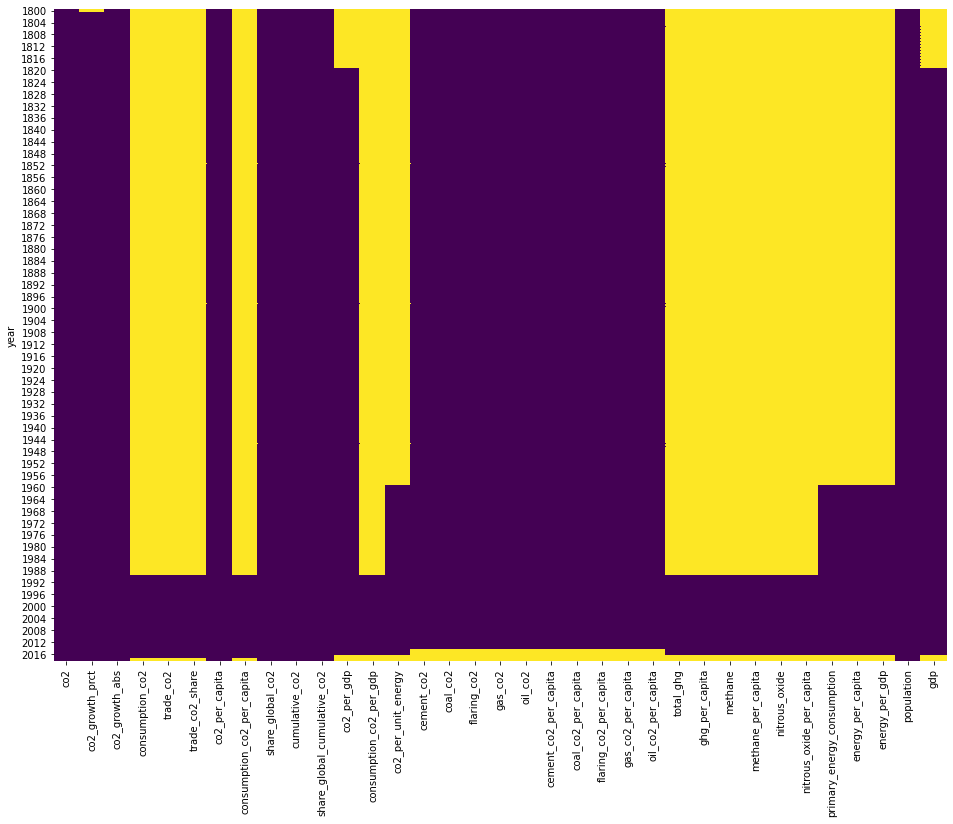

In [13]:
fig = plt.subplots(figsize=(16,12))
sns.heatmap(data.isnull(),cbar=False,cmap = 'viridis');

The five columns - cement,coal,flaring,gas,oil - have values only upto 2014 
They dont have values from 2015


In [14]:
data.tail(10)

,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009,5493.548,-7.333,-434.708,5825.450,331.902,6.042,17.935,19.018,17.427,355613.3,27.463,0.369,0.391,0.220,32.313,1840.511,8.907,1226.967,2150.497,0.105,6.009,0.029,4.006,7.021,5865.86,19.150,679.85,2.219,246.01,0.803,24989.15,81581.76,1.677,306000000.0,1.490000e+13
2010,5700.108,3.760,206.560,6039.789,339.680,5.959,18.446,19.546,17.238,361313.4,27.208,0.373,0.395,0.220,33.485,1910.153,8.936,1274.031,2164.512,0.108,6.182,0.029,4.123,7.005,6111.81,19.779,679.25,2.198,250.84,0.812,25856.73,83675.75,1.690,309000000.0,1.530000e+13
2011,5572.585,-2.237,-127.524,6001.477,428.892,7.696,17.885,19.261,16.219,366886.0,26.931,0.360,0.387,0.217,34.203,1827.310,11.281,1303.028,2109.533,0.110,5.865,0.036,4.182,6.770,6235.85,20.013,670.49,2.152,261.57,0.839,25634.25,82270.75,1.654,312000000.0,1.550000e+13
2012,5371.777,-3.603,-200.808,5781.911,410.134,7.635,17.105,18.411,15.383,372257.7,26.642,0.338,0.364,0.215,37.340,1626.464,11.465,1364.023,2075.956,0.119,5.179,0.037,4.343,6.610,5936.09,18.902,648.75,2.066,251.80,0.802,24986.52,79563.74,1.571,314000000.0,1.590000e+13
2013,5522.908,2.813,151.131,5892.961,370.052,6.700,17.455,18.625,15.687,377780.6,26.373,0.343,0.366,0.215,38.575,1651.149,14.026,1391.071,2060.121,0.122,5.219,0.044,4.397,6.511,6056.31,19.141,643.66,2.034,251.19,0.794,25679.34,81160.73,1.595,316000000.0,1.610000e+13
2014,5572.106,0.891,49.198,5939.828,367.721,6.599,17.485,18.639,15.693,383352.7,26.115,0.338,0.360,0.215,41.454,1648.972,15.550,1431.594,2112.410,0.130,5.174,0.049,4.492,6.629,6097.75,19.135,650.62,2.042,251.37,0.789,25968.99,81491.04,1.574,319000000.0,1.650000e+13
2015,5422.966,-2.677,-149.141,5804.531,381.565,7.036,16.900,18.090,15.292,388775.7,25.859,0.321,0.343,0.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5966.46,18.594,648.55,2.021,249.24,0.777,25739.63,80216.25,1.523,321000000.0,1.690000e+13
2016,5306.662,-2.145,-116.303,5694.022,387.360,7.300,16.428,17.628,14.875,394082.4,25.605,0.309,0.331,0.206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5833.49,18.059,629.38,1.948,251.70,0.779,25733.26,79665.59,1.496,323000000.0,1.720000e+13
2017,5270.749,-0.677,-35.914,5686.553,415.804,7.889,16.213,17.493,14.579,399353.1,25.352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325000000.0,NaN


In [15]:
# msno.heatmap(data)

In [16]:
# msno.dendrogram(df=data)

## Plotting CO2 values across years


        First graph in the below figure shows how CO2 values are increasing/decreasing each year from 1800
        We can see that the values start increasing slowly from around 1870s. 
        There's a sudden steep decline around 1930s. Maybe due to the great depression era.
        We see another sudden steep decline around 1970s. Maybe due to the inflation in late 1970s. Then with the start of Ronald Reagen presidency, the values start increasing unitl 2008.
        Then we see they're decreasing. Maybe since the recession year and also the Obama gov policies.


---

        The Second plot represents percentage change in CO2 emissions relative to the previous year emissions.
        As these values are relative to the previous year, the large spikes in the graph maybe are representing some events during those years. E.g. World wars, Recession eras, etc
        And then we can see there are smaller fluctuations in the second half of 20th century


---
        The third graph shows annual absolute change in CO2 emissions from one year relative to the previous year.
        This graph shows fluctuations in the values in only the 20th century.


In [17]:
# axes = plt.subplot(1,1,1)
# axes.axis([1800,2017,0,6000])
# axes.xaxis.set_minor_locator(plt.IndexLocator())

No handles with labels found to put in legend.


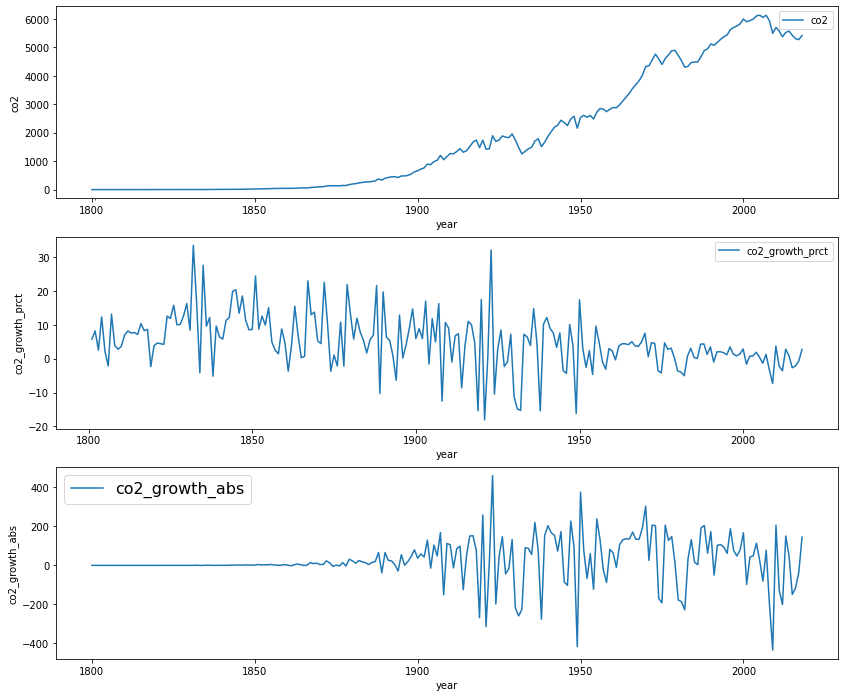

In [18]:
import matplotlib
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(14,12))
ax1.xaxis.set_minor_locator(plt.IndexLocator(base=1800,offset=1))
# ax1.xaxis.set_major_formatter(plt.IndexFormatter())
# ax2.tick_params(axis='x',which='minor')
# ax3.tick_params(axis='x',which='minor')

sns.lineplot(data=data,x='year',y='co2',ax=ax1,label='co2')
plt.legend(loc=2,prop={'size':16})
sns.lineplot(data=data,x='year',y='co2_growth_prct',ax=ax2,label='co2_growth_prct')
# plt.legend(loc=2,prop={'size':16});
sns.lineplot(data=data,x='year',y='co2_growth_abs',ax=ax3,label='co2_growth_abs')
plt.legend(loc=2,prop={'size':16});

## Consumption_CO2 and Trade_CO2 emmissions

We have values for these variables only from 1990 and not before that.

The first graph shows that the consumption based CO2 emissions were increasing rapidly upto around 2008. And then there is a sudden decline. Maybe again due to the recession that year.
Also the values didn't increase as compared to the years before 2008. Maybe because the Obama gov introduced some policies to account for these emmisions.

The second graph shows trade_co2 emmisions. This variable represents net co2 emissions embedded in trade.
The values here were increasing rapidly from around 1996 to 2006. Then there's a drop for 2-3 years. Post which they increase but the peak remains around year 2006.

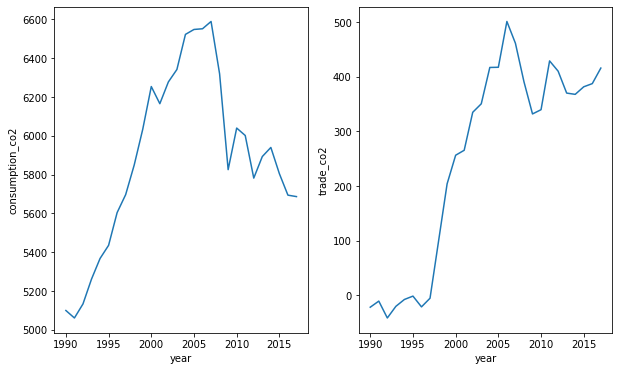

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))
sns.lineplot(data=data,x='year',y='consumption_co2',ax=ax1)
sns.lineplot(data=data,x='year',y='trade_co2',ax=ax2);

## The five CO2 emmissions and methane and N2O

1. The coal based co2 emissions were increasing rapidly until around mid-1920s. Then after some fluctuations there's a steep drop around 1930s.

    After which they catch up again to peak around 1945. They keep decreasing again until around 1960.

    Thereafter the values have steadily increased until around 2005. And then decrease.

2. The oil based co2 emissions started increasing considerably since 1900 and took over coal based emissions around year 1950.

    Also thereafter they've shown very very rapid growth until around 1970s. We see a drop there but they again catch up to peak around 2005.

From 1900 to around 1975, oil-based emissions maybe show an exponential growth here, during which they overtook coal around 1950 and have always been higher.



3. gas_co2 emissions start increasing maybe exponentially after around 1930 to around 1970. Then they decrease for some years but later start increasing again. And the important thing here is we dont see any drop for these values after around 2000.

4. We have data for Methane based emissions only from 1990. And these emissions are decreasing since then. I'm sure we may find some trend before 1990 for these emissions though, if we can obtain those values.

5. For NO based emissions also, values only from 1990 and they don't show any considerable growth or reduction.

6. The cement and flaring based emissions are pretty low compared to our first three emissions above. We can plot them seperately another figure.

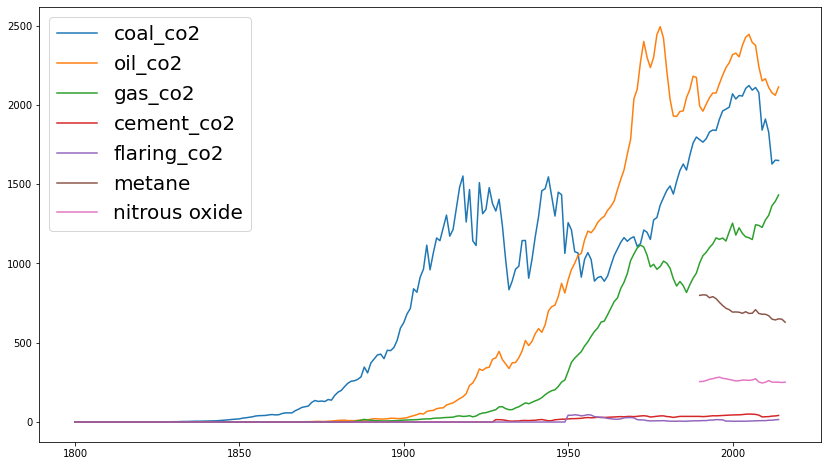

In [20]:
fig,axs = plt.subplots(figsize=(14,8))
# sns.lineplot(x=data.index,y=data['coal_co2'],legend='full')
# sns.lineplot(x=data.index,y=data['oil_co2'],legend='full')
# sns.lineplot(x=data.index,y=data['gas_co2'],legend='full');

plt.plot(data.index,data['coal_co2'],label='coal_co2')
plt.plot(data.index,data['oil_co2'],label='oil_co2')
plt.plot(data.index,data['gas_co2'],label='gas_co2')
plt.plot(data.index,data['cement_co2'],label='cement_co2')
plt.plot(data.index,data['flaring_co2'],label='flaring_co2')
plt.plot(data.index,data['methane'],label='metane')
plt.plot(data.index,data['nitrous_oxide'],label='nitrous oxide')
# plt.plot(data.index,data['total_ghg'],label='total_ghg')

plt.legend(prop={'size': 20});

6. The below graphs show cement and flaring based co2 emissions values are zero until 1928 and 1950, respectively.

    The important trend that we can notice here is that the cement based co2 emissions keep increasing from 1928 to around 2003.

    But the flaring based emissions kept decreasing from around 1955, though last few years show some increase.

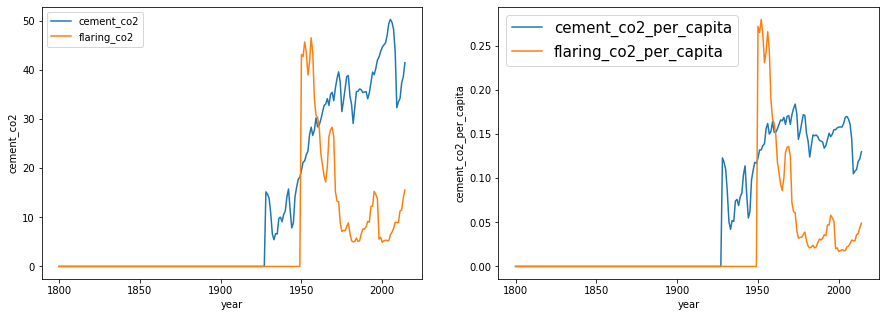

In [21]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.lineplot(x=data.index,y=data['cement_co2'],label='cement_co2',ax=ax1)
sns.lineplot(x=data.index,y=data['flaring_co2'],label='flaring_co2',ax=ax1)
sns.lineplot(x=data.index,y=data['cement_co2_per_capita'],label='cement_co2_per_capita',ax=ax2)
sns.lineplot(x=data.index,y=data['flaring_co2_per_capita'],label='flaring_co2_per_capita',ax=ax2)
plt.legend(prop={'size':15});

### Per capita values for the above emissions.

The trends here are mostly the same with the ones we just discussed.

One important point is that the peak of coal-based-per-capita-emissions is higher than oil-based-per-capita-emissions peak.

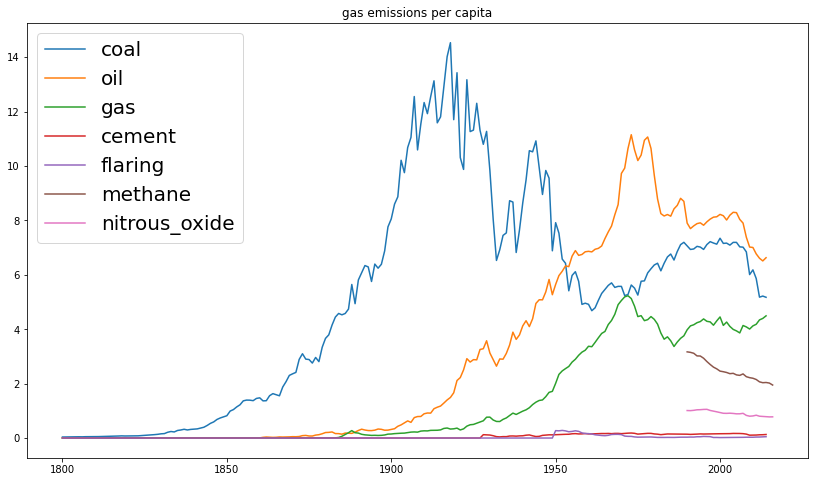

In [22]:
fig,axs = plt.subplots(figsize=(14,8))
plt.plot(data.index,data['coal_co2_per_capita'],label='coal')
plt.plot(data.index,data['oil_co2_per_capita'],label='oil')
plt.plot(data.index,data['gas_co2_per_capita'],label='gas')
plt.plot(data.index,data['cement_co2_per_capita'],label='cement')
plt.plot(data.index,data['flaring_co2_per_capita'],label='flaring')
plt.plot(data.index,data['methane_per_capita'],label='methane')
plt.plot(data.index,data['nitrous_oxide_per_capita'],label='nitrous_oxide')

plt.title('gas emissions per capita')
plt.legend(prop={'size':20});

## Total GHG emissions

For total GHG emissions too, we're having values only from 1990.

These values show very rapid increase from 1990 to around 2000.
And a sudden drop around 2006

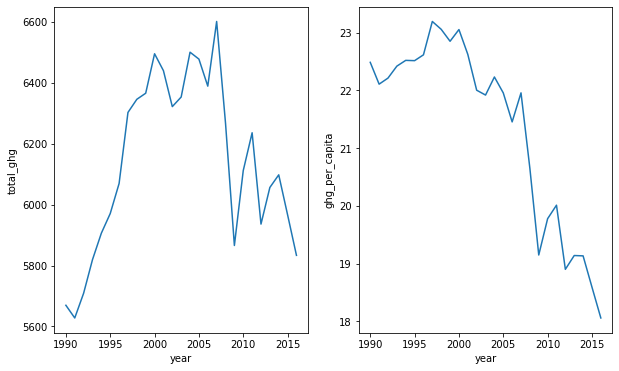

In [23]:
# fig, axs = plt.subplots(1,2,figsize=(10,8))
# plt.plot(data.index,data['total_ghg'],label='total_ghg',ax=axs[1])
# plt.plot(data.index,data['ghg_per_capita'],label='ghg_per_capita',ax=axs[2])
# plt.legend()


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))
sns.lineplot(data=data,x='year',y='total_ghg',ax=ax1)
sns.lineplot(data=data,x='year',y='ghg_per_capita',ax=ax2);

## Population and GDP over the years

As we can see the population has been growing consistently linearly.

So I think, this growth makes important impact on per_capita values for the emissions

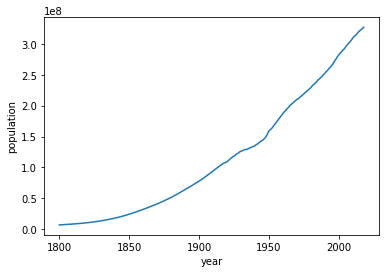

In [24]:
sns.lineplot(data=data,x='year',y='population');

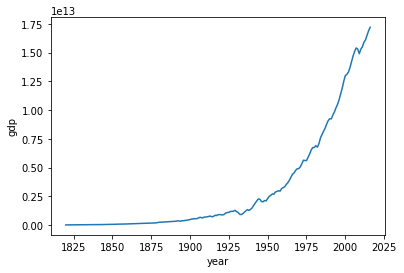

In [25]:
sns.lineplot(data=data,x='year',y='gdp');

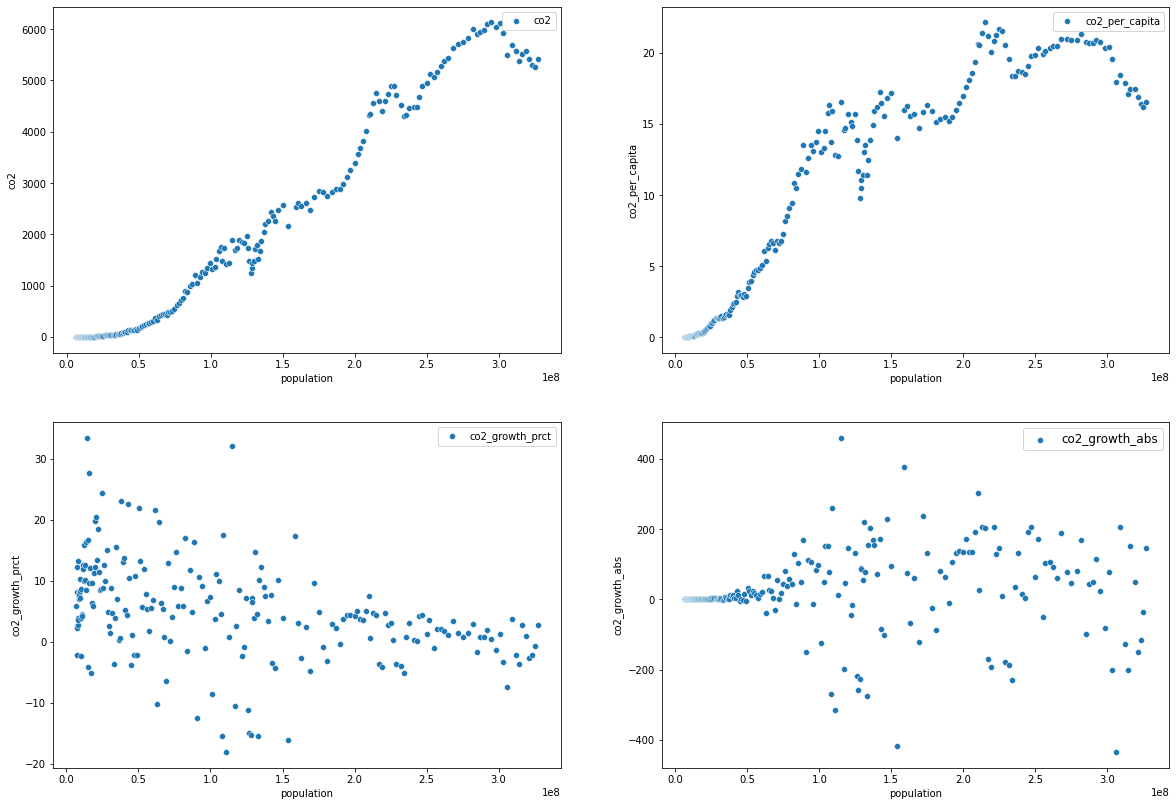

In [26]:
fig, axs = plt.subplots(2,2,figsize=(20,14))

sns.scatterplot(x=data['population'],y=data['co2'],ax=axs[0][0], label='co2')
sns.scatterplot(x=data['population'],y=data['co2_per_capita'],ax=axs[0][1], label='co2_per_capita')
sns.scatterplot(x=data['population'],y=data['co2_growth_prct'],ax=axs[1][0], label='co2_growth_prct')
sns.scatterplot(x=data['population'],y=data['co2_growth_abs'],ax=axs[1][1], label='co2_growth_abs')

plt.legend(prop={'size':12});

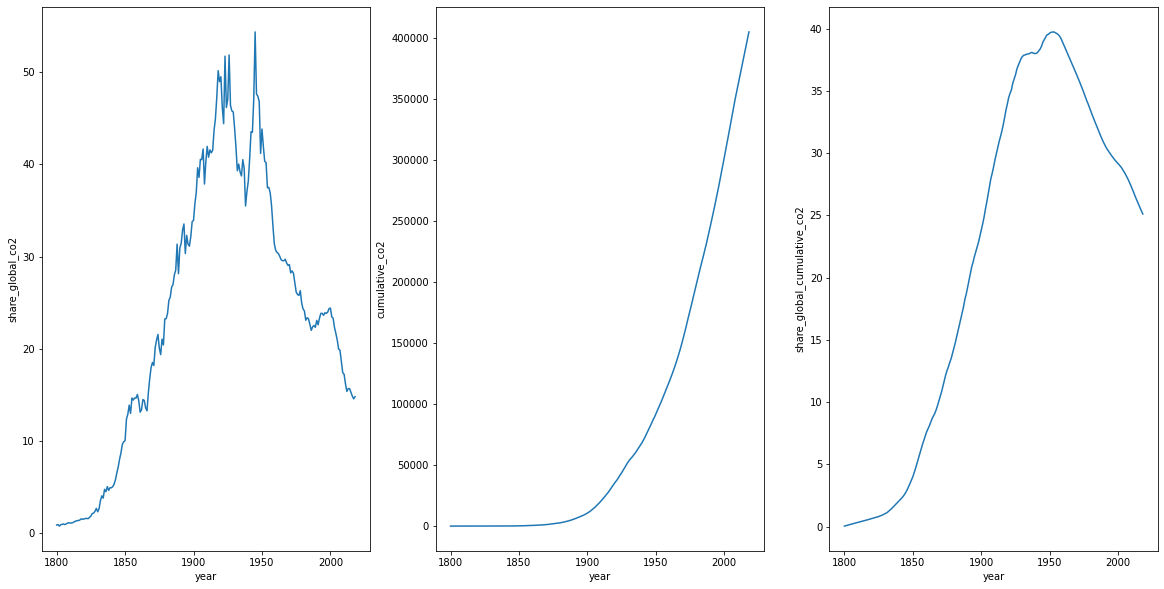

In [27]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))
sns.lineplot(x=data.index,y=data['share_global_co2'],ax=ax1)
sns.lineplot(x=data.index,y=data['cumulative_co2'],ax=ax2)
sns.lineplot(x=data.index,y=data['share_global_cumulative_co2'],ax=ax3);

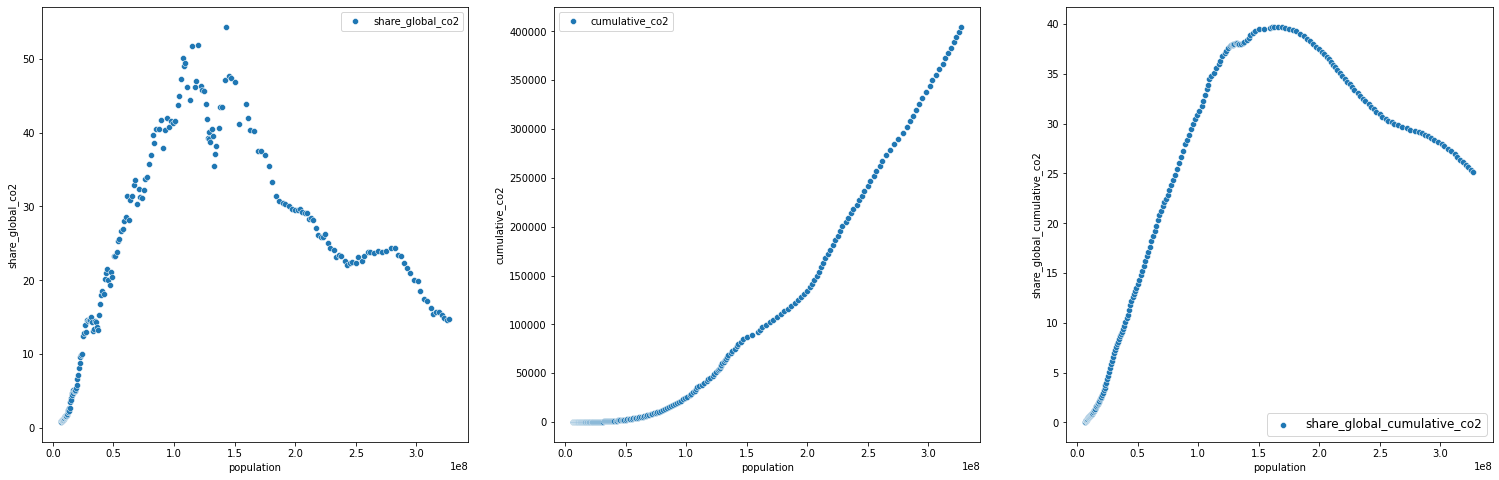

In [28]:
fig, axs = plt.subplots(1,3,figsize=(26,8))

sns.scatterplot(x=data['population'],y=data['share_global_co2'],ax=axs[0], label='share_global_co2')
sns.scatterplot(x=data['population'],y=data['cumulative_co2'],ax=axs[1], label='cumulative_co2')
sns.scatterplot(x=data['population'],y=data['share_global_cumulative_co2'],ax=axs[2], label='share_global_cumulative_co2')
# sns.scatterplot(x=data['population'],y=data['co2_growth_abs'],ax=axs[1][1], label='co2_growth_abs')

plt.legend(prop={'size':12});

# sns.scatterplot(x=data['population'],y=data['share_global_co2'])

In [29]:
data.corr()

,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
co2,1.000000,-0.370633,0.119114,0.934665,0.517516,0.451170,0.908214,0.742919,0.282274,0.959937,0.671844,-0.047930,-0.153808,-0.393193,0.962616,0.907889,0.481073,0.963718,0.977210,0.902623,0.460546,0.378863,0.952975,0.944644,0.964970,0.256265,-0.422199,-0.410494,0.228146,-0.177370,0.990726,0.694194,-0.846513,0.983606,0.920937
co2_growth_prct,-0.370633,1.000000,0.543807,-0.125108,-0.431260,-0.460542,-0.379988,0.356276,-0.233236,-0.352988,-0.386759,-0.146112,0.503374,0.395622,-0.333667,-0.368384,-0.157579,-0.319239,-0.340009,-0.342979,-0.249886,-0.126938,-0.330702,-0.358200,0.103166,0.531490,0.422024,0.445999,0.491206,0.527812,-0.338396,-0.038962,0.405866,-0.401674,-0.323683
co2_growth_abs,0.119114,0.543807,1.000000,-0.104548,-0.411337,-0.440668,0.197126,0.360680,0.171164,0.030850,0.169094,0.142196,0.490098,0.362737,0.139823,0.171210,0.204950,0.110768,0.126118,0.167571,0.193774,0.197165,0.153627,0.166118,0.127168,0.530059,0.402014,0.427282,0.499336,0.518387,-0.228437,0.078664,0.326751,0.091382,-0.013840
consumption_co2,0.934665,-0.125108,-0.104548,1.000000,0.787921,0.738472,0.137193,0.492969,-0.149768,0.474257,-0.350826,-0.531916,-0.445548,0.099575,0.766323,0.707499,-0.509341,0.451618,0.915965,0.389500,0.059155,-0.629223,-0.250684,0.143119,0.896367,-0.059739,-0.659637,-0.660327,-0.041516,-0.477031,0.948485,0.119064,-0.602496,0.507653,0.650407
trade_co2,0.517516,-0.431260,-0.411337,0.787921,1.000000,0.995898,-0.470084,-0.100277,-0.690973,0.866362,-0.792589,-0.876816,-0.820732,-0.400147,0.441787,0.315037,-0.338466,0.667704,0.626063,-0.035750,-0.384290,-0.521908,-0.229880,-0.307410,0.526437,-0.585115,-0.881411,-0.903174,-0.492506,-0.856946,0.838715,-0.449750,-0.913073,0.881338,0.924290
trade_co2_share,0.451170,-0.460542,-0.440668,0.738472,0.995898,1.000000,-0.542542,-0.183534,-0.743194,0.902729,-0.839261,-0.910415,-0.861307,-0.470783,0.389367,0.255485,-0.299461,0.705761,0.579527,-0.096500,-0.443685,-0.490564,-0.194150,-0.367236,0.475715,-0.643097,-0.906817,-0.928139,-0.530823,-0.890403,0.817426,-0.513586,-0.939996,0.915375,0.946273
co2_per_capita,0.908214,-0.379988,0.197126,0.137193,-0.470084,-0.542542,1.000000,0.925267,0.638238,0.780450,0.902473,0.349393,0.829781,0.273392,0.828518,0.961707,0.486442,0.796745,0.848862,0.842492,0.748625,0.413685,0.845586,0.901697,0.416574,0.973942,0.606671,0.643931,0.731424,0.790992,0.481669,0.965553,-0.069042,0.921184,0.705169
consumption_co2_per_capita,0.742919,0.356276,0.360680,0.492969,-0.100277,-0.183534,0.925267,1.000000,0.766804,-0.531386,0.636917,0.465992,0.551013,0.882910,0.822115,0.922273,-0.669700,-0.409604,0.794463,0.912432,0.856977,-0.574892,-0.342219,0.904248,0.704601,0.819187,0.272769,0.305134,0.587771,0.489924,0.286571,0.897218,0.387927,-0.498664,-0.329747
share_global_co2,0.282274,-0.233236,0.171164,-0.149768,-0.690973,-0.743194,0.638238,0.766804,1.000000,0.104966,0.865383,0.925438,0.930668,0.836652,0.170713,0.611084,0.222302,0.099198,0.179992,0.286834,0.923059,0.236860,0.200382,0.335577,0.152846,0.968841,0.746627,0.797381,0.718026,0.903438,-0.809235,-0.195694,0.913598,0.371469,-0.060332
cumulative_co2,0.959937,-0.352988,0.030850,0.474257,0.866362,0.902729,0.780450,-0.531386,0.104966,1.000000,0.511341,-0.205887,-0.993554,-0.692538,0.940353,0.835736,0.423187,0.966082,0.948495,0.838179,0.319365,0.311812,0.910449,0.865395,0.226043,-0.860162,-0.940237,-0.971543,-0.605157,-0.960309,0.918834,0.289259,-0.976525,0.954440,0.987736


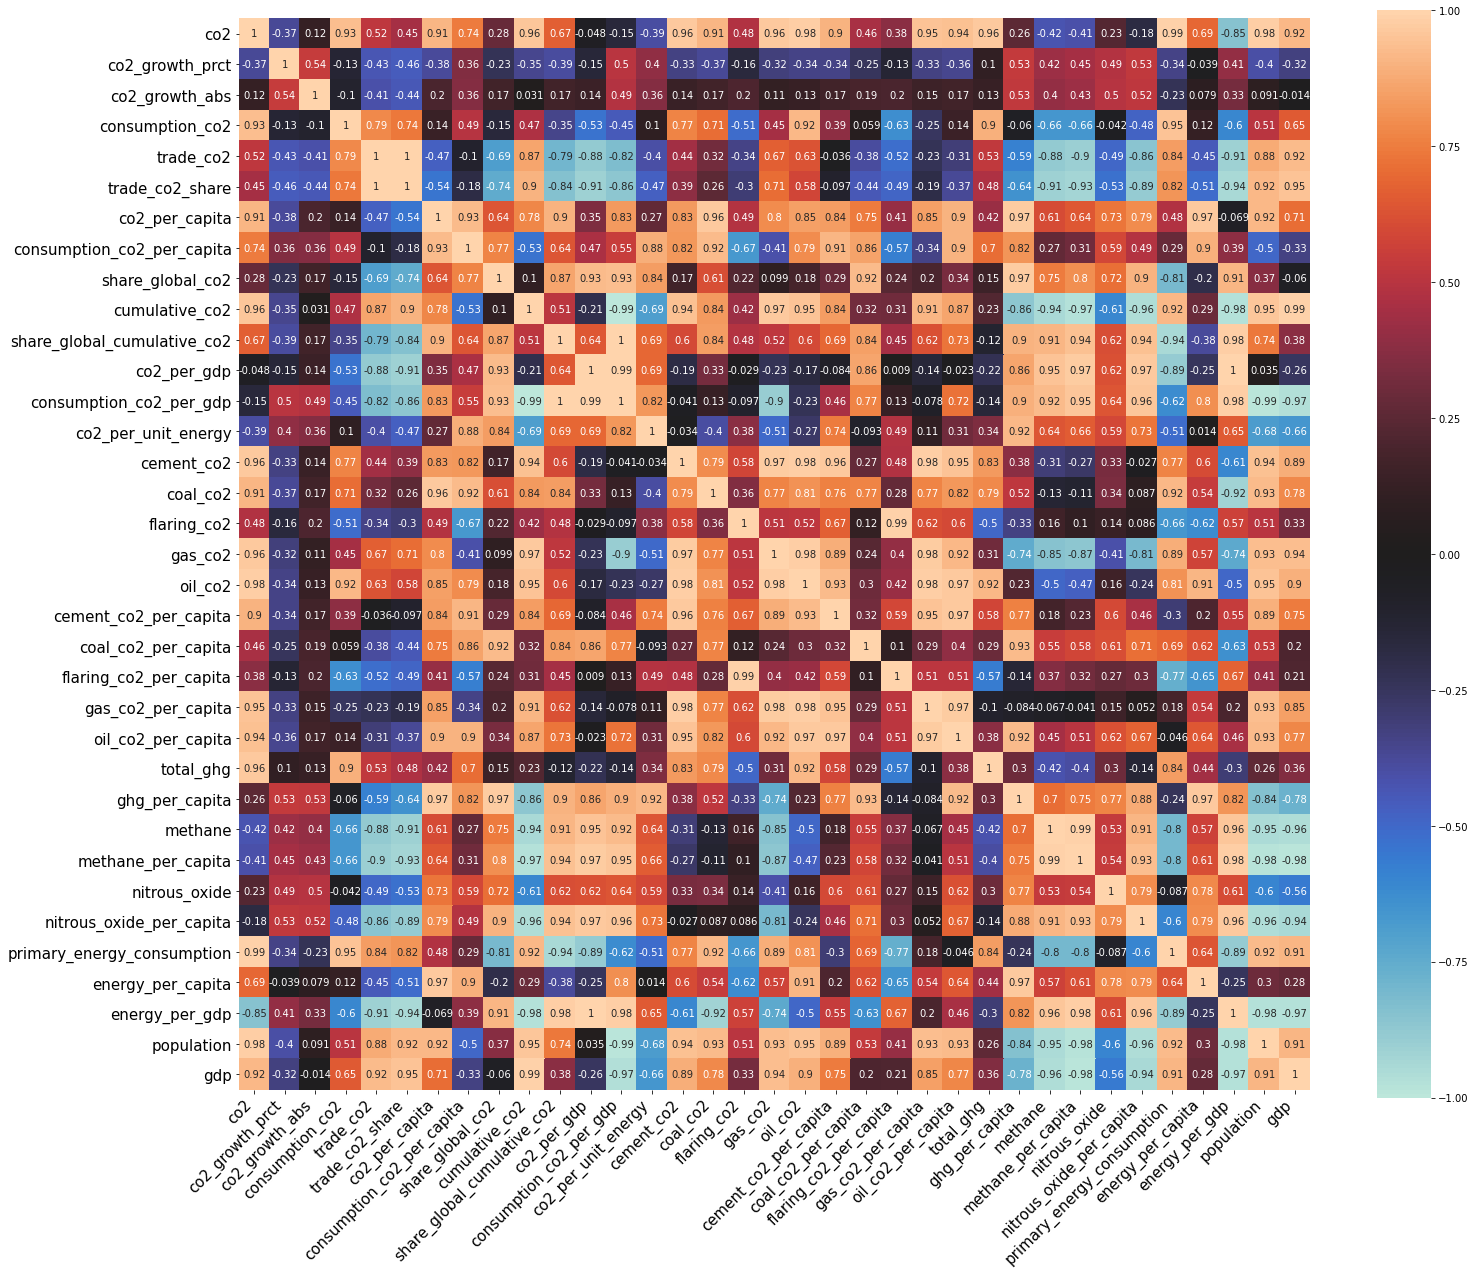

In [30]:
fig, ax = plt.subplots(figsize=(24,20))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=15
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize=15
);